In [67]:
import pandas as pd

# Import Heart Attack Data

In [68]:
ha_costs_df = pd.read_csv ("mmd_heart_attack_data.csv")

## Examine Heart Attack Data

In [69]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
year                   2656 non-null int64
geography              2656 non-null object
measure                2656 non-null object
adjustment             2656 non-null object
analysis               2656 non-null object
domain                 2656 non-null object
condition              2656 non-null object
primary_sex            2656 non-null object
primary_age            2656 non-null object
primary_dual           2656 non-null object
fips                   2656 non-null int64
county                 2656 non-null object
state                  2656 non-null object
urban                  2656 non-null object
primary_race           2656 non-null object
primary_denominator    2656 non-null object
analysis_value         2656 non-null int64
dtypes: int64(3), object(14)
memory usage: 352.8+ KB


In [70]:
ha_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615


In [71]:
ha_costs_df.tail(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


## Clean Heart Attack Data

In [72]:
ha_costs_df_onlyTN = ha_costs_df.loc[ha_costs_df["state"] == "TENNESSEE"]

In [73]:
ha_costs_df_onlyTN.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661
2032,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,undefined,44423
2033,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,undefined,41240
2034,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,38968


In [74]:
ha_costs_df_onlyTN.shape

(91, 17)

In [75]:
ha_costs_df_onlyTN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 2030 to 2120
Data columns (total 17 columns):
year                   91 non-null int64
geography              91 non-null object
measure                91 non-null object
adjustment             91 non-null object
analysis               91 non-null object
domain                 91 non-null object
condition              91 non-null object
primary_sex            91 non-null object
primary_age            91 non-null object
primary_dual           91 non-null object
fips                   91 non-null int64
county                 91 non-null object
state                  91 non-null object
urban                  91 non-null object
primary_race           91 non-null object
primary_denominator    91 non-null object
analysis_value         91 non-null int64
dtypes: int64(3), object(14)
memory usage: 12.8+ KB


In [76]:
ha_costs_df_onlyTN["county"].unique()

array(['Anderson County', 'Bedford County', 'Benton County',
       'Bledsoe County', 'Blount County', 'Bradley County',
       'Campbell County', 'Cannon County', 'Carroll County',
       'Carter County', 'Cheatham County', 'Chester County',
       'Claiborne County', 'Clay County', 'Cocke County', 'Coffee County',
       'Crockett County', 'Cumberland County', 'Davidson County',
       'Decatur County', 'DeKalb County', 'Dickson County', 'Dyer County',
       'Fayette County', 'Fentress County', 'Franklin County',
       'Gibson County', 'Giles County', 'Grainger County',
       'Greene County', 'Grundy County', 'Hamblen County',
       'Hamilton County', 'Hardeman County', 'Hardin County',
       'Hawkins County', 'Haywood County', 'Henderson County',
       'Henry County', 'Hickman County', 'Houston County',
       'Humphreys County', 'Jackson County', 'Jefferson County',
       'Johnson County', 'Knox County', 'Lake County',
       'Lauderdale County', 'Lawrence County', 'Lewis Co

In [77]:
UniqueCounties_ha_costs_df_onlyTN = ha_costs_df_onlyTN["county"].unique()

In [78]:
UniqueCounties_ha_costs_df_onlyTN.shape

(91,)

### Counting Urban and Rural Counties and studying cost differences between them

In [79]:
# The next one is a more easy method than the one below
ha_costs_df_onlyTN.groupby("urban")["urban"].count()

urban
Rural    53
Urban    38
Name: urban, dtype: int64

In [80]:
ha_costs_df_onlyTN.urban.value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

In [81]:
# One way is to visualize the differences
from matplotlib import pyplot as plt

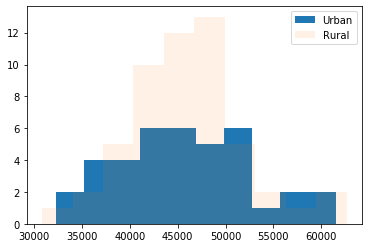

In [82]:
plt.hist(ha_costs_df_onlyTN.analysis_value[ha_costs_df_onlyTN.urban == "Urban"], label ="Urban")
plt.hist(ha_costs_df_onlyTN.analysis_value[ha_costs_df_onlyTN.urban == "Rural"], label = "Rural", alpha = 0.1)
plt.legend()
plt.show()

# Import Cancer Data

In [83]:
cancer_costs_df = pd.read_csv("mmd_cancer_data.csv")

## Examine Cancer Data

In [84]:
cancer_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151


In [85]:
cancer_costs_df.tail(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


In [86]:
cancer_costs_df.shape

(3165, 17)

## Clean Cancer Data

In [87]:
cancer_costs_df_OnlyTN = cancer_costs_df.loc[cancer_costs_df["state"]=="TENNESSEE"]

In [88]:
cancer_costs_df_OnlyTN.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219


In [89]:
cancer_costs_df_OnlyTN.shape

(95, 17)

### Counting Urban and Rural Counties and studying cost differences between them

In [90]:
UniqueCounties_cancer_costs_df_OnlyTN = cancer_costs_df_OnlyTN["county"].unique()

In [91]:
UniqueCounties_cancer_costs_df_OnlyTN

array(['Anderson County', 'Bedford County', 'Benton County',
       'Bledsoe County', 'Blount County', 'Bradley County',
       'Campbell County', 'Cannon County', 'Carroll County',
       'Carter County', 'Cheatham County', 'Chester County',
       'Claiborne County', 'Clay County', 'Cocke County', 'Coffee County',
       'Crockett County', 'Cumberland County', 'Davidson County',
       'Decatur County', 'DeKalb County', 'Dickson County', 'Dyer County',
       'Fayette County', 'Fentress County', 'Franklin County',
       'Gibson County', 'Giles County', 'Grainger County',
       'Greene County', 'Grundy County', 'Hamblen County',
       'Hamilton County', 'Hancock County', 'Hardeman County',
       'Hardin County', 'Hawkins County', 'Haywood County',
       'Henderson County', 'Henry County', 'Hickman County',
       'Houston County', 'Humphreys County', 'Jackson County',
       'Jefferson County', 'Johnson County', 'Knox County', 'Lake County',
       'Lauderdale County', 'Lawrence 

In [92]:
UniqueCounties_cancer_costs_df_OnlyTN.shape

(95,)

# Comparing "counties" in two different databases

In [93]:
cancer_costs_df_OnlyTN.county

2396      Anderson County
2397       Bedford County
2398        Benton County
2399       Bledsoe County
2400        Blount County
2401       Bradley County
2402      Campbell County
2403        Cannon County
2404       Carroll County
2405        Carter County
2406      Cheatham County
2407       Chester County
2408     Claiborne County
2409          Clay County
2410         Cocke County
2411        Coffee County
2412      Crockett County
2413    Cumberland County
2414      Davidson County
2415       Decatur County
2416        DeKalb County
2417       Dickson County
2418          Dyer County
2419       Fayette County
2420      Fentress County
2421      Franklin County
2422        Gibson County
2423         Giles County
2424      Grainger County
2425        Greene County
              ...        
2461         Obion County
2462       Overton County
2463         Perry County
2464       Pickett County
2465          Polk County
2466        Putnam County
2467          Rhea County
2468        

In [94]:
ha_costs_df_onlyTN.county

2030      Anderson County
2031       Bedford County
2032        Benton County
2033       Bledsoe County
2034        Blount County
2035       Bradley County
2036      Campbell County
2037        Cannon County
2038       Carroll County
2039        Carter County
2040      Cheatham County
2041       Chester County
2042     Claiborne County
2043          Clay County
2044         Cocke County
2045        Coffee County
2046      Crockett County
2047    Cumberland County
2048      Davidson County
2049       Decatur County
2050        DeKalb County
2051       Dickson County
2052          Dyer County
2053       Fayette County
2054      Fentress County
2055      Franklin County
2056        Gibson County
2057         Giles County
2058      Grainger County
2059        Greene County
              ...        
2091    Montgomery County
2092        Morgan County
2093         Obion County
2094       Overton County
2095         Perry County
2096          Polk County
2097        Putnam County
2098        

In [95]:
# we can create a list of counties in each dataset and use the set difference() method
cancer_counties = list(cancer_costs_df_OnlyTN.county.unique())
ha_counties = list(ha_costs_df_onlyTN.county.unique())

list(set(cancer_counties).difference(ha_counties))

['Hancock County', 'Van Buren County', 'Moore County', 'Pickett County']

# Cost analysis for Cancer Data

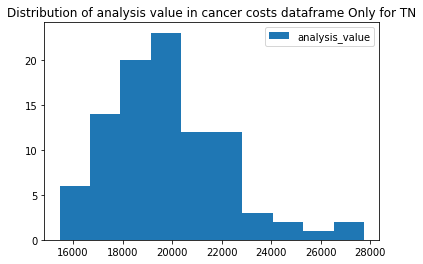

In [96]:
# This is a visual method; a better method will follow.
plt.hist(cancer_costs_df_OnlyTN.analysis_value, label = "analysis_value")
plt.title("Distribution of analysis value in cancer costs dataframe Only for TN")
plt.legend()
plt.show()

In [97]:
# This is a better method to examine data statistics
cancer_costs_df_OnlyTN.analysis_value.describe()

count       95.000000
mean     19757.894737
std       2436.304533
min      15454.000000
25%      18103.500000
50%      19563.000000
75%      21153.000000
max      27740.000000
Name: analysis_value, dtype: float64

# Import IRS Data

In [98]:
income_df = pd.read_csv("irs_county_2016.csv")

## Examine IRS Data

In [99]:
income_df.shape

(25536, 148)

In [100]:
income_df.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152


## Clean IRS Data

In [101]:
income_df_OnlyTN = income_df.loc[income_df["STATE"]=="TN"]

In [102]:
income_df_OnlyTN.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [103]:
income_df_OnlyTN.tail()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


In [104]:
income_df_OnlyTN.shape

(768, 148)

### Keep only required columns

In [105]:
SelectedColumns_income_df_OnlyTN = income_df_OnlyTN[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

In [106]:
SelectedColumns_income_df_OnlyTN.head()

,STATE,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,N2,NUMDEP,ELDERLY,A00100,N02650,A02650,N02300,A02300
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


### Rename column names

In [107]:
OldColumnNames = ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']

In [108]:
NewColumnNames = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

In [109]:
Final_CleanData_income = SelectedColumns_income_df_OnlyTN.rename({'STATE': 'state', 'COUNTYNAME':'county', 'agi_stub': 'income_bucket', 'N1':'return_count', 'mars1':'single_returns', 'MARS2': 'joint_returns', 'MARS4': 'head_of_house_returns', 'N2': 'exemptions', 'NUMDEP': 'dependents', 'ELDERLY': 'elderly', 'A00100': 'agi', 'N02650': 'returns_with_total_inc', 'A02650': 'total_inc_amt', 'N02300': 'returns_with_unemployment', 'A02300': 'unemployment_comp' }, axis='columns')

In [110]:
Final_CleanData_income.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


### Income Dictionary 

In [ ]:
# Create income_dict, a dictionary that uses the numerical codes in the income bucket column as keys and the matching 
descriptions ('Total', 'Under $1', 'Between 1 and $10,000', 'Between 10,000 and $25,000','Between 25,000 and $50,000',
              'Between 50,000 and $75,000', 'Between 75,000 and $100,000', 'Between 100,000 and $200,000', 
              '$200,000 or more') as values.

In [113]:
Final_CleanData_income.income_bucket.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
income_dict = { 1:'Total', 2:'Under $1', 3:'Between 1 and $10,000', 4:'Between 10,000 and $25,000', 5:'Between 25,000 and $50,000'  }